<a href="https://colab.research.google.com/github/leenmajdi003/Flowres-Website/blob/main/FactFinderX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q datasets transformers
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [4]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Make sure you have a zipped file of the Kaggle datasets in the location
!ls -al "/content/drive/MyDrive/Data2/"

total 2376329
-rw------- 1 root root  499048119 Aug 22 17:55  Ai_vs_Real.zip
-rw------- 1 root root        726 Aug 22 18:39  config.json
-rw------- 1 root root 1588604321 Aug 19 19:14  FoodClassification.zip
-rw------- 1 root root  343223968 Aug 22 18:39  model.safetensors
-rw------- 1 root root        327 Aug 22 18:39  preprocessor_config.json
-rw------- 1 root root    2481473 Aug 22 17:38 'programmer b6ab9813-5f0a-44c7-970b-afc6e1ec07f0.png'


In [6]:
!unzip "/content/drive/MyDrive/Data2/Ai_vs_Real.zip" -d /tmp/aivsrealimg

Archive:  /content/drive/MyDrive/Data2/Ai_vs_Real.zip
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg  
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/-s-fluffy-fur-and-round-features-immediately-melted-the-viewer-s-heart-photo.jpg  
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/-using-generative-ai-technology-landscape-pattern-abstract-concept-269270897.jpg  
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/-yellow-kimono-with-a-golden-crown-and-a-very-detailed-Barn-owl-copy-800x800.jpg  
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/.amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png  
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/0002_AI-in-animal-classification.png  
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/00urban_biodiversity_landscape_architecture_14ed209d-45ca-4c57-b995-4d1552813cc1.jpg  
  inflating: /tmp/aivsrealimg/AiArtData/AiArtData/03a3g

In [7]:
from datasets import load_dataset
ds = load_dataset("imagefolder", data_dir="/tmp/aivsrealimg")
ds = ds['train']

Resolving data files:   0%|          | 0/973 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [8]:
data = ds.train_test_split(test_size=0.15)

In [9]:
data.push_to_hub("itsLeen/deepfake_vs_real_image_detection")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/826 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/146 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/506 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/itsLeen/deepfake_vs_real_image_detection/commit/216b65c9eb4af419be857967589b493805a02d66', commit_message='Upload dataset', commit_description='', oid='216b65c9eb4af419be857967589b493805a02d66', pr_url=None, pr_revision=None, pr_num=None)

In [10]:
ex = data['train'][400]
ex

{'image': <PIL.Image.Image image mode=RGB size=1024x510>, 'label': 0}

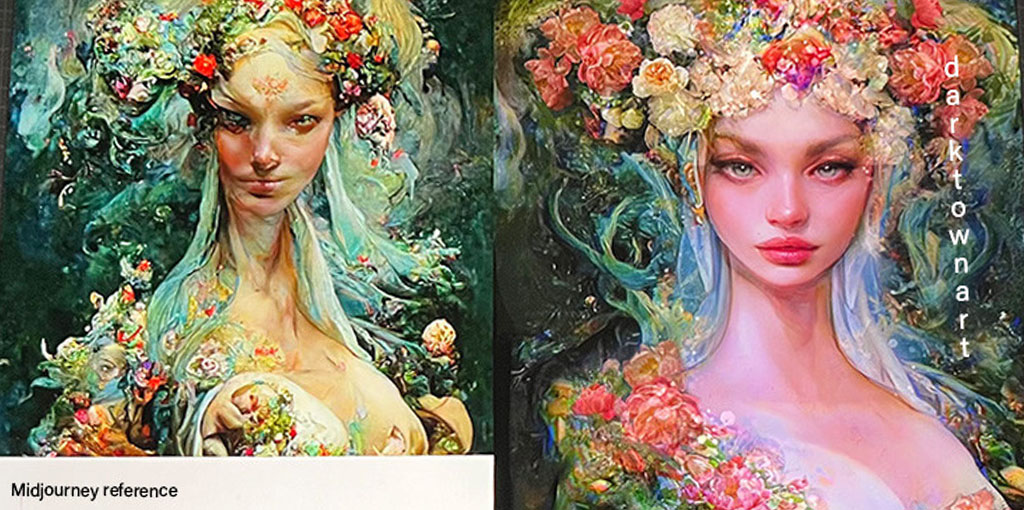

In [11]:
image = ex['image']
image

In [12]:
labels = data['train'].features['label']
labels

ClassLabel(names=['AiArtData', 'RealArt'], id=None)

In [13]:
labels.int2str(ex['label'])

'AiArtData'

In [14]:
from datasets import load_metric

metric = load_metric("accuracy")

<ipython-input-14-350fcae91df9>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] غ
The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [15]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 826
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 146
    })
})

In [16]:
labels = data["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

In [17]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'dima806/deepfake_vs_real_image_detection'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [18]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)
import torchvision.transforms as transforms # Import the transforms module

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

# Extract size information from feature_extractor
size = feature_extractor.size['height']  # Assuming height and width are the same

train_transforms = Compose(
        [
            RandomResizedCrop(size),  # Use the extracted size
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )
val_transforms = transforms.Compose( # Now you can use transforms.Compose
    [
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ]
)


def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

In [19]:
# split up training into training + validation
train_ds = data['train']
val_ds = data['test']

In [20]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

In [21]:
train_ds[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1840x1840>,
 'label': 0,
 'pixel_values': tensor([[[-0.7725, -0.7804, -0.7804,  ..., -0.4824, -0.4902, -0.4980],
          [-0.7725, -0.7725, -0.7647,  ..., -0.4824, -0.4824, -0.4902],
          [-0.7804, -0.7725, -0.7569,  ..., -0.4745, -0.4902, -0.5059],
          ...,
          [-0.5451, -0.5608, -0.5843,  ..., -0.1529, -0.0667, -0.0980],
          [-0.4275, -0.4431, -0.4510,  ..., -0.2078, -0.3882, -0.6235],
          [-0.4667, -0.4667, -0.4667,  ..., -0.8275, -0.8902, -0.8588]],
 
         [[-0.3647, -0.3569, -0.3569,  ..., -0.2000, -0.2078, -0.2157],
          [-0.3569, -0.3569, -0.3412,  ..., -0.2000, -0.2078, -0.2235],
          [-0.3490, -0.3412, -0.3255,  ..., -0.1922, -0.2078, -0.2235],
          ...,
          [-0.7020, -0.7098, -0.7255,  ..., -0.3804, -0.3020, -0.3333],
          [-0.6471, -0.6549, -0.6627,  ..., -0.4196, -0.5765, -0.7882],
          [-0.6863, -0.6863, -0.6941,  ..., -0.9137, -0.9451, -0.9294

In [22]:
from transformers import ViTForImageClassification
model_name_or_path = 'dima806/deepfake_vs_real_image_detection'
model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [23]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    'realFake-food',
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=True,
  report_to='tensorboard',
  load_best_model_at_end=True,
  hub_strategy="end"
)#

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [24]:
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [25]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [26]:
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [30]:
import torch
print(torch.cuda.device_count())

0


In [32]:
import torch

# تحقق من توفر أكثر من GPU
if torch.cuda.device_count() > 1:
    model = torch.nn.DataParallel(model)

# البدء في التدريب
train_results = trainer.train()

# حفظ النموذج، المقاييس، والحالة
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
100,0.320700,0.400047,0.821918
200,0.192600,0.461153,0.808219


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

events.out.tfevents.1724416871.ae625ff6b526.515.0:   0%|          | 0.00/14.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

***** train metrics *****
  epoch                    =         4.0
  total_flos               = 240759251GF
  train_loss               =      0.3669
  train_runtime            =  2:09:09.75
  train_samples_per_second =       0.426
  train_steps_per_second   =       0.027


In [33]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        4.0
  eval_accuracy           =     0.8219
  eval_loss               =        0.4
  eval_runtime            = 0:01:47.97
  eval_samples_per_second =      1.352
  eval_steps_per_second   =      0.176


In [34]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'ai_real_images',
    "tags": ['image-classification'],
}

if training_args.push_to_hub:
    trainer.push_to_hub('🍻 cheers', **kwargs)
else:
    trainer.create_model_card(**kwargs)

events.out.tfevents.1724424987.ae625ff6b526.515.1:   0%|          | 0.00/411 [00:00<?, ?B/s]

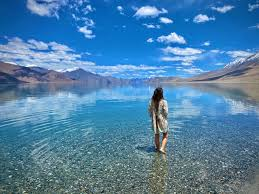

In [44]:
from PIL import Image
import requests

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQV3VFYpZBBGxeofef-f_49KH3VJRtmoTAAUA&s'
image = Image.open(requests.get(url, stream=True).raw)
image

In [45]:
#Rabee: this wrong you are using the same model from huggingface not the model that you trained
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

repo_name = '/content/realFake-food/checkpoint-208'

feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

In [46]:
#Rabee Load the model that you saved and put it here i think it will work after that
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

# Load model and feature extractor
feature_extractor = AutoFeatureExtractor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

#from transformers import AutoModelForImageClassification, AutoFeatureExtractor

# Replace with the name of your saved model
saved_model_path = repo_name

# Load the trained model and feature extractor
#loaded_model = AutoModelForImageClassification.from_pretrained(saved_model_path)
#loaded_feature_extractor = AutoFeatureExtractor.from_pretrained(saved_model_path)


In [47]:
# prepare image for the model
encoding = feature_extractor(image.convert("RGB"), return_tensors="pt")
print(encoding.pixel_values.shape)

torch.Size([1, 3, 224, 224])


In [48]:
import torch

# forward pass
with torch.no_grad():
  outputs = model(**encoding)
  logits = outputs.logits

In [49]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: RealArt
